<a href="https://colab.research.google.com/github/mofuoku417/Multivariate-Time-Series-Forecasting-of-Crude-Palm-Oil-Price-Using-Machine-Learning-Techniques/blob/main/MLP_RegressionC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

In [ ]:
#To compute Mean Directional Accuracy
def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

#Calculate the root mean squared error:
def RMSE(y_true, y_pred): 
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

#Calculate the mean absolute percentage error
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100
    return mape

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
#reading the csv file into pandas data frame
df = pd.read_csv("/content/gdrive/MyDrive/raw_data/df3.csv")

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.columns = ['Date', 'cpo_pri', 'cno_pri', 'sbo_pri', 'pno_pri']

In [ ]:
#setting the Date column as the index of the data frame
df['Date'] = df['Date'].apply(pd.to_datetime)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f39035e55d0>,
      dtype=object)

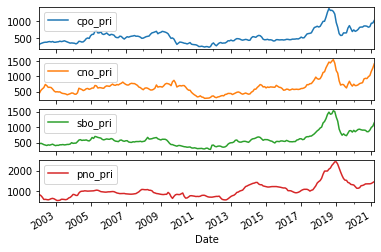

In [ ]:
df.set_index('Date')[['cpo_pri', 'cno_pri','sbo_pri', 'pno_pri']].plot(subplots=True)

In [ ]:
df.head()

,Date,cpo_pri,cno_pri,sbo_pri,pno_pri
0,2002-02-01,323,455,468.0,844.0
1,2002-03-01,345,546,485.0,799.0
2,2002-04-01,362,595,466.0,718.0
3,2002-05-01,376,636,442.0,614.0
4,2002-06-01,383,738,429.0,619.0


In [ ]:
df_train = df.iloc[0:184]
df_test = df.iloc[184:]

In [ ]:
del df['Date']

In [ ]:
df

,cpo_pri,cno_pri,sbo_pri,pno_pri
0,323,455,468.00,844.00
1,345,546,485.00,799.00
2,362,595,466.00,718.00
3,376,636,442.00,614.00
4,383,738,429.00,619.00
...,...,...,...,...
225,826,993,860.28,1366.87
226,844,1031,910.82,1366.87
227,944,1170,997.62,1383.90
228,949,1275,1035.26,1426.71


In [ ]:
x = df[['cno_pri', 'sbo_pri', 'pno_pri']]
y = df[['cpo_pri']]

In [ ]:
y = np.reshape(y, (-1,1))

In [ ]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [ ]:
len(X_train)

172

In [ ]:
230-172

58

In [ ]:
pipe_MLPRegressor = Pipeline([('scaler',  MinMaxScaler()),
            ('MLPRegressor', MLPRegressor(random_state = 42))])

In [ ]:
grid_params_MLPRegressor = [{
    'MLPRegressor__solver': ['lbfgs','sgd', 'adam'],
    'MLPRegressor__alpha': [0.0001, 0.05],
    'MLPRegressor__max_iter': [100,200,300, 500, 1000, 1500],
    'MLPRegressor__activation' : ['relu','logistic','tanh'],
    'MLPRegressor__learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'MLPRegressor__hidden_layer_sizes':[(50,50,50), (50,100,50), (100,)],}]


CV_mlpregressor_grid = GridSearchCV (estimator = pipe_MLPRegressor,
                               param_grid = grid_params_MLPRegressor, n_jobs=-1,
                               cv = 5,return_train_score=True, verbose=0)


CV_mlpregressor_grid.fit(X_train, y_train)

ypred=CV_mlpregressor_grid.predict(X_test)

print (np.c_[y_test, ypred])

#print (np.c_[y_test, ypred])
print('Train Accuracy : %.3f'%CV_mlpregressor_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%CV_mlpregressor_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%CV_mlpregressor_grid.best_score_)
print('Best Parameters : ',CV_mlpregressor_grid.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[0.37182852 0.36622322]
 [0.10673666 0.12250471]
 [0.16185477 0.17746186]
 [0.11023622 0.15177128]
 [0.37270341 0.31449583]
 [0.32633421 0.32390379]
 [0.35958005 0.40136611]
 [0.52405949 0.49306911]
 [0.52230971 0.54579386]
 [0.60542432 0.59273485]
 [0.92650919 1.01779493]
 [0.51793526 0.59094498]
 [0.26771654 0.24361874]
 [0.32983377 0.30742244]
 [1.         0.98292412]
 [0.28608924 0.26530564]
 [0.24846894 0.2889818 ]
 [0.08661417 0.13878762]
 [0.14698163 0.12601118]
 [0.1032371  0.14307259]
 [0.16885389 0.1580106 ]
 [0.27646544 0.27360627]
 [0.1959755  0.19905945]
 [0.07786527 0.13295245]
 [0.30621172 0.30912201]
 [0.2615923  0.24789229]
 [0.18285214 0.18562595]
 [0.08573928 0.09854135]
 [0.167979   0.15800655]
 [0.26246719 0.30676391]
 [0.4295713  0.47734676]
 [0.26334208 0.29066108]
 [0.55905512 0.51684266]
 [0.01749781 0.03349061]
 [0.95013123 0.92923372]
 [0.29133858 0.27811694]
 [0.38495188 0.36281662]
 [0.13823272 0.19582482]
 [0.20209974 0.19425187]
 [0.21872266 0.24427616]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best Parameters :  {'MLPRegressor__activation': 'relu', 'MLPRegressor__alpha': 0.0001, 'MLPRegressor__hidden_layer_sizes': (50, 100, 50), 'MLPRegressor__learning_rate': 'constant', 'MLPRegressor__max_iter': 300, 'MLPRegressor__solver': 'lbfgs'}
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                48        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=250, batch_size=50,  verbose=1, validation_split=0.2)

Epoch 1/250
3/3 [==============================] - 0s 58ms/step - loss: 0.0770 - mse: 0.0770 - mae: 0.2326 - val_loss: 0.0890 - val_mse: 0.0890 - val_mae: 0.2391
Epoch 2/250
3/3 [==============================] - 0s 10ms/step - loss: 0.0669 - mse: 0.0669 - mae: 0.2114 - val_loss: 0.0769 - val_mse: 0.0769 - val_mae: 0.2176
Epoch 3/250
3/3 [==============================] - 0s 10ms/step - loss: 0.0554 - mse: 0.0554 - mae: 0.1857 - val_loss: 0.0637 - val_mse: 0.0637 - val_mae: 0.1912
Epoch 4/250
3/3 [==============================] - 0s 11ms/step - loss: 0.0437 - mse: 0.0437 - mae: 0.1572 - val_loss: 0.0504 - val_mse: 0.0504 - val_mae: 0.1628
Epoch 5/250
3/3 [==============================] - 0s 11ms/step - loss: 0.0335 - mse: 0.0335 - mae: 0.1292 - val_loss: 0.0387 - val_mse: 0.0387 - val_mae: 0.1371
Epoch 6/250
3/3 [==============================] - 0s 10ms/step - loss: 0.0247 - mse: 0.0247 - mae: 0.1085 - val_loss: 0.0296 - val_mse: 0.0296 - val_mae: 0.1219
Epoch 7/250
3/3 [===========

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


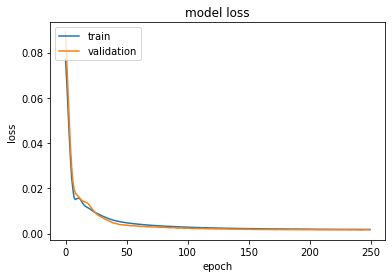

In [ ]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
MAE_mlp = mean_absolute_error(y_test, y_pred)
print('MAE value of the MLP Model is:', MAE_mlp)

MDA_mlp = np.mean((np.sign(y_test[1:] - y_test[:-1]) == np.sign(y_pred[1:] - y_pred[:-1])).astype(int))
print('MDA value of the MLP Model is:', (MDA_mlp))

MAPE_mlp = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE value of the MLP Model is:', (MAPE_mlp))

RMSE_mlp = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE value of the MLP Model is:', (RMSE_mlp))

MSE_mlp = mean_squared_error(y_test, y_pred)
print('MSE value of the MLP Model is:', (MSE_mlp))

MAE value of the MLP Model is: 0.03899795025302518
MDA value of the MLP Model is: 0.9122807017543859
MAPE value of the MLP Model is: 26.206230326245567
RMSE value of the MLP Model is: 0.05059356018810106
MSE value of the MLP Model is: 0.0025597083325070045


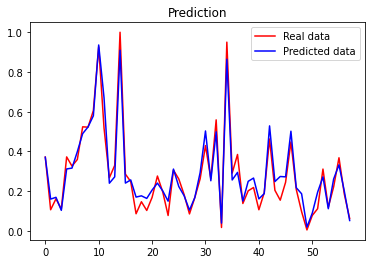

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()